In [1]:
# Import necessary libraries
# import pandas as pd
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Step 1: Load the dataset
data = pd.read_csv('Order2.csv', header=None)
data.head(20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Step 2: Convert the Rows of Dataset into List of Lists
transactions = data.stack().groupby(level=0).apply(list).tolist()

#Displaying transaction from index no 2 to 9
transactions[2:10]

[['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries']]

In [4]:
# Step 3: Create a DataFrame for one-hot encoding
encoder = TransactionEncoder()
onehot = encoder.fit(transactions).transform(transactions)
df = pd.DataFrame(onehot, columns=encoder.columns_)

print(df.shape)
df.head()

(7501, 120)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [5]:
print(onehot.shape)
print(onehot)

(7501, 120)
[[False  True  True ...  True False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False  True False]]


In [6]:
# Step 4: Apply Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(mineral water, ground beef, milk)"
253,0.017064,"(spaghetti, mineral water, ground beef)"
254,0.015731,"(spaghetti, mineral water, milk)"
255,0.010265,"(spaghetti, mineral water, olive oil)"


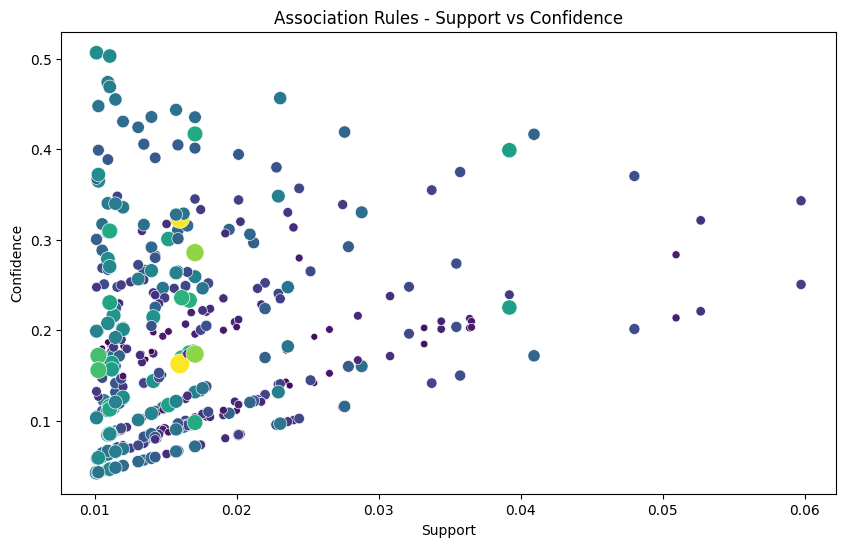

                   antecedents                 consequents   support  \
0              (mineral water)                   (avocado)  0.011598   
1                    (avocado)             (mineral water)  0.011598   
2                    (burgers)                      (cake)  0.011465   
3                       (cake)                   (burgers)  0.011465   
4                    (burgers)                 (chocolate)  0.017064   
..                         ...                         ...       ...   
401      (spaghetti, pancakes)             (mineral water)  0.011465   
402  (mineral water, pancakes)                 (spaghetti)  0.011465   
403                (spaghetti)   (mineral water, pancakes)  0.011465   
404            (mineral water)       (spaghetti, pancakes)  0.011465   
405                 (pancakes)  (spaghetti, mineral water)  0.011465   

     confidence      lift  
0      0.048658  1.459926  
1      0.348000  1.459926  
2      0.131498  1.622319  
3      0.141447  1.6223

In [7]:
frequent_itemsets
# Step 5: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1,num_itemsets=None)
     
# Step 6: Visualize the raules
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', sizes=(20, 200), hue='lift', palette='viridis', legend=False)
plt.title('Association Rules - Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()
# Display rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])